In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('float_format', '{:.2f}'.format)
pd.options.display.max_colwidth = 1000

import warnings
warnings.filterwarnings('ignore') #disable commands

In [2]:
data = pd.read_csv('upl751_msc_food_anon.csv', sep=',', header=None, 
                   names=['inn','kkt_reg_id', 'document_day', 'revenue', 'cash', 'ecash'], 
                   dtype = {"inn": "str", "kkt_reg_id": "str"})

In [3]:
data.head()

,inn,kkt_reg_id,document_day,revenue,cash,ecash
0,inn2822,0002782394002476,2021-07-14,227879,0,227879
1,inn2187,0001606974061834,2021-07-27,952594,245288,707306
2,inn2424,0000704629035891,2021-06-07,1257046,0,1257046
3,inn5618,0000767521053949,2021-08-22,21518,0,21518
4,inn1114,0002170192003284,2021-06-15,4124232,251012,3873220


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483881 entries, 0 to 1483880
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inn           1483881 non-null  object
 1   kkt_reg_id    1483881 non-null  object
 2   document_day  1483881 non-null  object
 3   revenue       1483881 non-null  int64 
 4   cash          1483881 non-null  int64 
 5   ecash         1483881 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 67.9+ MB


In [6]:
data.groupby('inn')['kkt_reg_id']

пропорция ИНН с количеством операций меньше 500 шт. составляет 96.09%
пропорция ИНН с количеством операций больше 500 и меньше 78613 шт. составляет 3.91%



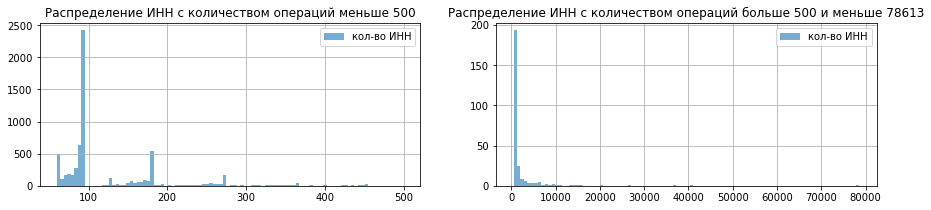

In [7]:
fig, ax1 = plt.subplots(1,2, figsize=(15,3))

rnm_quantity = 500

inn_prop_1 = len(data['inn'].value_counts()[data['inn'].value_counts() < rnm_quantity]) / len(data['inn'].value_counts())
print(f'пропорция ИНН с количеством операций меньше {rnm_quantity} шт. составляет {inn_prop_1:.2%}')

rnm_quantity_top = data['inn'].value_counts().max()+1
inn_prop_1 = len(data['inn'].value_counts()[(data['inn'].value_counts() >= rnm_quantity)&(data['inn'].value_counts() < rnm_quantity_top)]) / len(data['inn'].value_counts())
print(f'пропорция ИНН с количеством операций больше {rnm_quantity} и меньше {rnm_quantity_top} шт. составляет {inn_prop_1:.2%}')

print()

rnm_count_byinn = data['inn'].value_counts()[data['inn'].value_counts() < rnm_quantity]

ax1[0].hist(rnm_count_byinn, 100, alpha=0.6, label='кол-во ИНН')
ax1[0].legend(loc='upper right')
ax1[0].set_title(label=f'Распределение ИНН с количеством операций меньше {rnm_quantity}', fontdict=None, loc='center', pad=None)
ax1[0].grid(True)

rnm_count_byinn = data['inn'].value_counts()[(data['inn'].value_counts() >= rnm_quantity)&(data['inn'].value_counts() < rnm_quantity_top)]

ax1[1].hist(rnm_count_byinn, 100, alpha=0.6, label='кол-во ИНН')
ax1[1].legend(loc='upper right')
ax1[1].set_title(label=f'Распределение ИНН с количеством операций больше {rnm_quantity} и меньше {rnm_quantity_top}', fontdict=None, loc='center', pad=None)
ax1[1].grid(True)
plt.show()

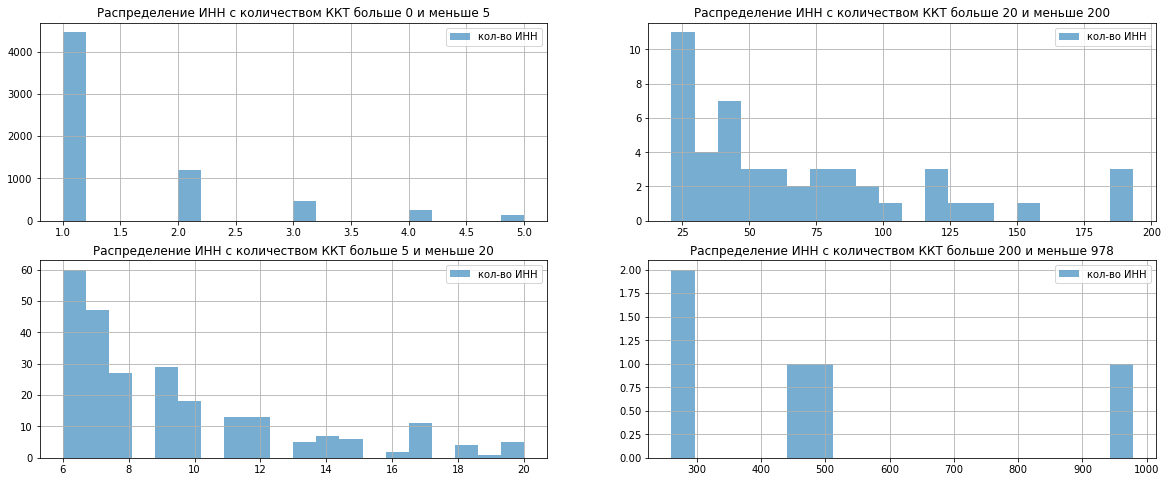

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

rnm_quantity_low = 0
rnm_quantity_top = 5
df = data.groupby('inn')['kkt_reg_id'].nunique()[(data.groupby('inn')['kkt_reg_id'].nunique() > rnm_quantity_low)&(data.groupby('inn')['kkt_reg_id'].nunique() <= rnm_quantity_top)].sort_values(ascending=False)

ax[0][0].hist(df, 20, alpha=0.6, label='кол-во ИНН')
ax[0][0].legend(loc='upper right')
ax[0][0].set_title(label=f'Распределение ИНН с количеством ККТ больше {rnm_quantity_low} и меньше {rnm_quantity_top}', fontdict=None, loc='center', pad=None)
ax[0][0].grid(True)

rnm_quantity_low = 5
rnm_quantity_top = 20
df = data.groupby('inn')['kkt_reg_id'].nunique()[(data.groupby('inn')['kkt_reg_id'].nunique() > rnm_quantity_low)&(data.groupby('inn')['kkt_reg_id'].nunique() <= rnm_quantity_top)].sort_values(ascending=False)

ax[1][0].hist(df, 20, alpha=0.6, label='кол-во ИНН')
ax[1][0].legend(loc='upper right')
ax[1][0].set_title(label=f'Распределение ИНН с количеством ККТ больше {rnm_quantity_low} и меньше {rnm_quantity_top}', fontdict=None, loc='center', pad=None)
ax[1][0].grid(True)

rnm_quantity_low = 20
rnm_quantity_top = 200
df = data.groupby('inn')['kkt_reg_id'].nunique()[(data.groupby('inn')['kkt_reg_id'].nunique() > rnm_quantity_low)&(data.groupby('inn')['kkt_reg_id'].nunique() <= rnm_quantity_top)].sort_values(ascending=False)

ax[0][1].hist(df, 20, alpha=0.6, label='кол-во ИНН')
ax[0][1].legend(loc='upper right')
ax[0][1].set_title(label=f'Распределение ИНН с количеством ККТ больше {rnm_quantity_low} и меньше {rnm_quantity_top}', fontdict=None, loc='center', pad=None)
ax[0][1].grid(True)

rnm_quantity_low = 200
rnm_quantity_top = data.groupby('inn')['kkt_reg_id'].nunique().max()
df = data.groupby('inn')['kkt_reg_id'].nunique()[(data.groupby('inn')['kkt_reg_id'].nunique() > rnm_quantity_low)&(data.groupby('inn')['kkt_reg_id'].nunique() <= rnm_quantity_top)].sort_values(ascending=False)

ax[1][1].hist(df, 20, alpha=0.6, label='кол-во ИНН')
ax[1][1].legend(loc='upper right')
ax[1][1].set_title(label=f'Распределение ИНН с количеством ККТ больше {rnm_quantity_low} и меньше {rnm_quantity_top}', fontdict=None, loc='center', pad=None)
ax[1][1].grid(True)
plt.show()

### Обогащение таблицы данными

In [9]:
# добавляю максимум и минимум дохода по ккт для нормализации
data_rnm_max_min = (data
 .pivot_table(index='kkt_reg_id', values='revenue', aggfunc=['max','min'])
 .reset_index()
 .droplevel(1, axis=1)                    
)

data = pd.merge(data, data_rnm_max_min, on='kkt_reg_id', how='left')

In [10]:
# добавляю колонку с нормализованным доходом
data['rev_norm'] = (data['revenue'] - data['min']) / (data['max'] - data['min'])

In [11]:
# добавляю колонку с обозначением дня недели
data['weekday'] = 0
for i in range(len(data)):
    data['weekday'][i] = pd.Timestamp(data['document_day'][i]).weekday()+1
    print(f'{i/len(data):.2%}', end="\r")
print()

100.00%


In [12]:
data['salary_day'] = (data['weekday'].isin([5,6,7]))*1

In [13]:
# добавляю колонку средняя и ст.откл.
data_mean_std = (data
 .pivot_table(index='inn', values='rev_norm', aggfunc=['mean','std'])
 .reset_index()
).droplevel(1, axis=1)

data = pd.merge(data, data_mean_std, on='inn', how='left')

In [14]:
# разбиваю на группы по колличеству ккт на инн
inn_kkt_count_group = pd.DataFrame(data.groupby('inn')['kkt_reg_id'].nunique()).reset_index()
inn_kkt_count_group['group'] = 0
inn_kkt_count_group

for i in range(len(inn_kkt_count_group)):
    if (inn_kkt_count_group['kkt_reg_id'].iloc[i] > 0)&(inn_kkt_count_group['kkt_reg_id'].iloc[i] <= 5):
        inn_kkt_count_group['group'].iloc[i] = 1
    elif (inn_kkt_count_group['kkt_reg_id'].iloc[i] > 5)&(inn_kkt_count_group['kkt_reg_id'].iloc[i] <= 20):
        inn_kkt_count_group['group'].iloc[i] = 2
    elif (inn_kkt_count_group['kkt_reg_id'].iloc[i] > 20)&(inn_kkt_count_group['kkt_reg_id'].iloc[i] <= 200):
        inn_kkt_count_group['group'].iloc[i] = 3
    else:
        inn_kkt_count_group['group'].iloc[i] = 4
print(inn_kkt_count_group['group'].value_counts())

# добавляю коловнку с группой
inn_kkt_count_group.columns = ['inn','count_rnm_byinn','group_rnm']
data = pd.merge(data,inn_kkt_count_group, on='inn', how='left')

1    6501
2     248
3      48
4       5
Name: group, dtype: int64


In [15]:
# разбиваю на группы по колличеству ккт на инн
inn_oper_count_group = pd.DataFrame(data.groupby('inn')['kkt_reg_id'].count()).reset_index()
inn_oper_count_group['group'] = 0
inn_oper_count_group

for i in range(len(inn_kkt_count_group)):
    if (inn_oper_count_group['kkt_reg_id'].iloc[i] > 0)&(inn_oper_count_group['kkt_reg_id'].iloc[i] <= 100):
        inn_oper_count_group['group'].iloc[i] = 1
    elif (inn_oper_count_group['kkt_reg_id'].iloc[i] > 100)&(inn_oper_count_group['kkt_reg_id'].iloc[i] <= 200):
        inn_oper_count_group['group'].iloc[i] = 2
    elif (inn_oper_count_group['kkt_reg_id'].iloc[i] > 200)&(inn_oper_count_group['kkt_reg_id'].iloc[i] <= 280):
        inn_oper_count_group['group'].iloc[i] = 3
    elif (inn_oper_count_group['kkt_reg_id'].iloc[i] > 280)&(inn_oper_count_group['kkt_reg_id'].iloc[i] <= 500):
        inn_oper_count_group['group'].iloc[i] = 4   
    elif (inn_oper_count_group['kkt_reg_id'].iloc[i] > 500)&(inn_oper_count_group['kkt_reg_id'].iloc[i] <= 5000):
        inn_oper_count_group['group'].iloc[i] = 5  
    else:
        inn_oper_count_group['group'].iloc[i] = 6
print(inn_oper_count_group['group'].value_counts())

# добавляю коловнку с группой
inn_oper_count_group.columns = ['inn','count_oper_byinn','group_oper']
data = pd.merge(data,inn_oper_count_group, on='inn', how='left')

1    4455
2    1266
3     449
4     366
5     240
6      26
Name: group, dtype: int64


In [16]:
# data = data.drop(['count_na_inn_x'], axis=1) 

In [17]:
# столбец с обозначением падения дохода данного ккт ниже обозначенных ст.откл.
data['isout_day'] = 0
data['isout_day'] = (data.rev_norm < (data['mean'] - data['std'] * 2))*1

In [18]:
# считаю сколько доход по каждому ккт падает ниже обозначенных ст.откл.
kkt_outcount = data.groupby('kkt_reg_id')['isout_day'].sum().reset_index()
kkt_outcount.columns = ['kkt_reg_id','outcount_kkt']

In [25]:
# считаю сколько у каждого инн было пропущенных дней не подряд
import math
# формирую таблицу со всеми днями для каждого инн
inn_count_na_1 = (data
 .pivot_table(index='document_day', columns='inn', values='rev_norm', aggfunc='mean')
 .reset_index()
 .set_index('document_day')
)

# формирую словарь с подсчетом пропущенных дней неподряд
inn_list = {}
for col in range(inn_count_na_1.shape[1]):
    calc = 0
    calc_2 = 0
    for row in range(inn_count_na_1.shape[0]-1):
        if calc_2 != row-1:
            if math.isnan(inn_count_na_1.iloc[row][col]) != math.isnan(inn_count_na_1.iloc[row+1][col]):
                calc += 1
                calc_2 = row
                inn_list[inn_count_na_1.columns[col]] = calc
    print(f'{col/inn_count_na_1.shape[1]:.2%}', end="\r")
print()
            
# формирую датафрейм из словаря
inn_count_na = pd.DataFrame.from_dict(inn_list, orient='index', columns=['count_na_inn']).reset_index().rename(columns={'index': 'inn'})

# test
# inn_count_na_1['7707772117'].plot(kind='bar', figsize=(18,5))

99.99%


In [26]:
# собираю в отдельную таблицу полученные данные по ккт
data = pd.merge(data, kkt_outcount, on='kkt_reg_id', how='left')
data = pd.merge(data, inn_count_na, on='inn', how='left')
data.count_na_inn = data.count_na_inn.fillna(value=0)
data['count_na_inn'] = data['count_na_inn'].astype('int')

### Поиск целевой группы ИНН 

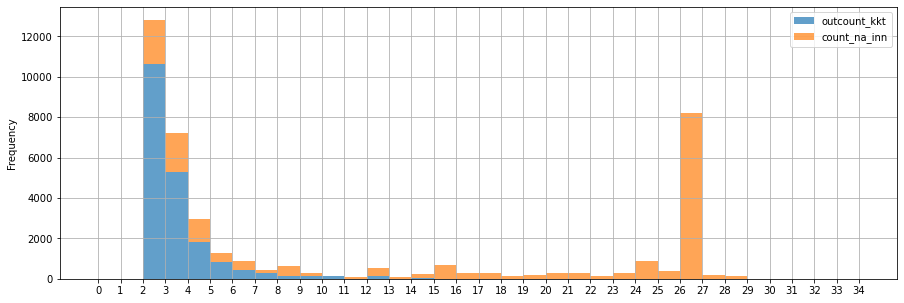

In [27]:
# смотрю распределения по двум параметрам:
# кол-во дней доход ккт падал ниже двух стандартных отклонений по инн 
# и кол-во пропущенных дней на инн. пропущенные дни приравниваются к нулевой выручке. пропущенные дни подряд не считаются, то есть серия пропущенных дней считается как 2 пропущенных - начало и конец серии. 
# видна довольна большая группа инн у которых по 26 пропущенных дней. нужно изучить их внимательнее. это наша целевая группа
data[(data.outcount_kkt > 1)&(data.count_na_inn > 1)].plot.hist(y=['outcount_kkt','count_na_inn'], alpha=0.7, figsize=(15,5), stacked=True, bins=range(35), xticks=range(35))
plt.grid(True)
plt.show()

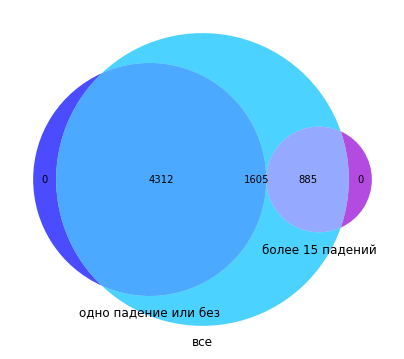

In [42]:
from matplotlib_venn import venn3, venn3_circles
dfA = pd.DataFrame(data[(data.count_na_inn >= 15)].inn.tolist(),columns=['A'])
dfB = pd.DataFrame(data.inn.tolist(),columns=['B'])
dfC = pd.DataFrame(data[(data.count_na_inn <= 1)].inn.tolist(),columns=['C'])

# dfA = pd.DataFrame(data[(data.outcount_kkt >= 15)].inn.tolist(),columns=['A'])
# dfB = pd.DataFrame(data[((data.outcount_kkt < 15))&((data.outcount_kkt > 1))].inn.tolist(),columns=['B'])
# dfC = pd.DataFrame(data[(data.outcount_kkt <= 1)].inn.tolist(),columns=['C'])

# dfA = pd.DataFrame(inn_count_test[(inn_count_test.count_na_inn_x >= 17)].inn.tolist(),columns=['A'])
# dfB = pd.DataFrame(inn_count_test[(inn_count_test.count_na_inn_y >= 17)].inn.tolist(),columns=['B'])
# dfC = pd.DataFrame(inn_count_test[(inn_count_test.count_na_inn_y <= 3)].inn.tolist(),columns=['C'])

A = set(dfA.A)
B = set(dfB.B)
C = set(dfC.C)

AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap

sets = {}               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('более 15 падений', 'все', 'одно падение или без')  
# labels = ('A', 'B', 'C')  
plt.figure(figsize=(7,7)) 
ax = plt.gca() 
venn3(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('darkviolet','deepskyblue','blue'),alpha=0.7)  
plt.show()

In [43]:
# data_rnm_out = data_rnm_out_v1[(data_rnm_out_v1.outcount_kkt >= 6)|(data_rnm_out_v1.count_na_inn >= 6)]

# val = [2,3,4,5]
# data_rnm_out = data[(data.outcount_kkt.isin(val))&(data.count_na_inn < 16)]
# print(f'количество уникальных инн у которых доход ккт падает {val} раз(а):', data_rnm_out.inn.nunique())
# print('всего уникальных инн:', data.inn.nunique())

val = 15
data_rnm_out = data[(data.count_na_inn >= val)]
print(f'количество уникальных инн у которых доход ккт падает боле {val} раз(а):', data_rnm_out.inn.nunique())
print('всего уникальных инн:', data.inn.nunique())
print('доля целевых инн по отношению ко всем:', f'{data_rnm_out.inn.nunique()/data.inn.nunique():,.2%}')

количество уникальных инн у которых доход ккт падает боле 15 раз(а): 885
всего уникальных инн: 6802
доля целевых инн по отношению ко всем: 13.01%


In [44]:
# формирую временные ряды, для дальнейшего анализа целевой группы

inn_rev_byday_mean = (data_rnm_out
 .pivot_table(index='document_day', columns='inn', values='rev_norm', aggfunc='mean')
 .sort_values(by='document_day', ascending=False)
 .reset_index()
 .set_index('document_day')
 .fillna(value=0)
)

# inn_rev_byday_max = (data_rnm_out
#  .pivot_table(index='document_day', columns='inn', values='rev_norm', aggfunc='max')
#  .sort_values(by='document_day', ascending=False)
#  .reset_index()
#  .set_index('document_day')
#  .fillna(value=0)
# )

# inn_rev_byday_min = (data_rnm_out
#  .pivot_table(index='document_day', columns='inn', values='rev_norm', aggfunc='min')
#  .sort_values(by='document_day', ascending=False)
#  .reset_index()
#  .set_index('document_day')
#  .fillna(value=0)
# )

In [45]:
# матрица корреляций показывает, что довольно много инн в целевой группе коррелируют друг с другом, то есть их паттерны совпадают. матрица ниже дана в масштабе 100 на 100 инн. 

corr_matrix = inn_rev_byday_mean.corr()
cor_hight = corr_matrix.loc[corr_matrix.mean().sort_values(ascending=False).reset_index()['inn'].values.tolist()]

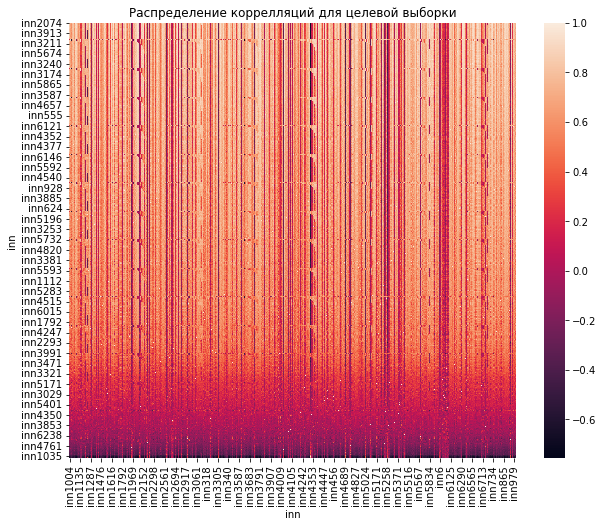

In [46]:
fig, ax1 = plt.subplots(figsize=(10,8))

sns.heatmap(cor_hight.iloc[0:,0:], ax=ax1)
ax1.set_title('Распределение коррелляций для целевой выборки')
plt.show()

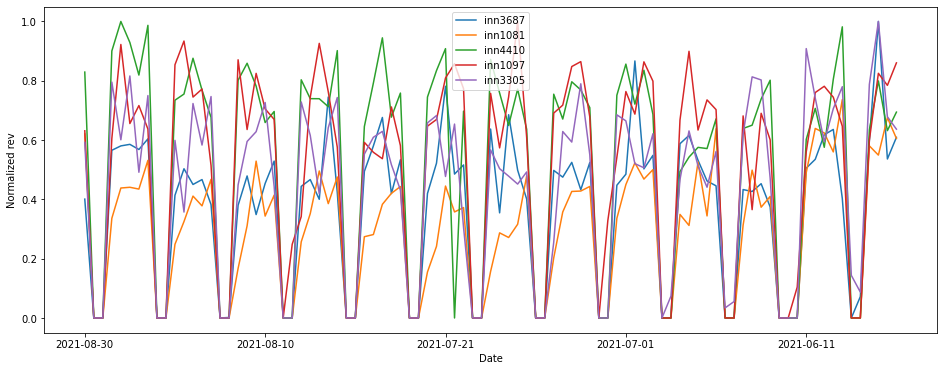

In [48]:
# если взять топ инн с высокой корреляцией, то можно увидеть что они и на графиках показывают схожие падения, и их частоту.

fig, ax = plt.subplots(figsize=(16, 6))
cols = corr_matrix.mean().sort_values(ascending=False).reset_index()['inn'].values.tolist()[100:105]
for col in cols:
    inn_rev_byday_mean[col] = inn_rev_byday_mean[col].astype('float64')    
    inn_rev_byday_mean.plot(y=col, use_index=True, ax=ax)
ax.set_ylabel('Normalized rev')
ax.set_xlabel('Date')
plt.show()

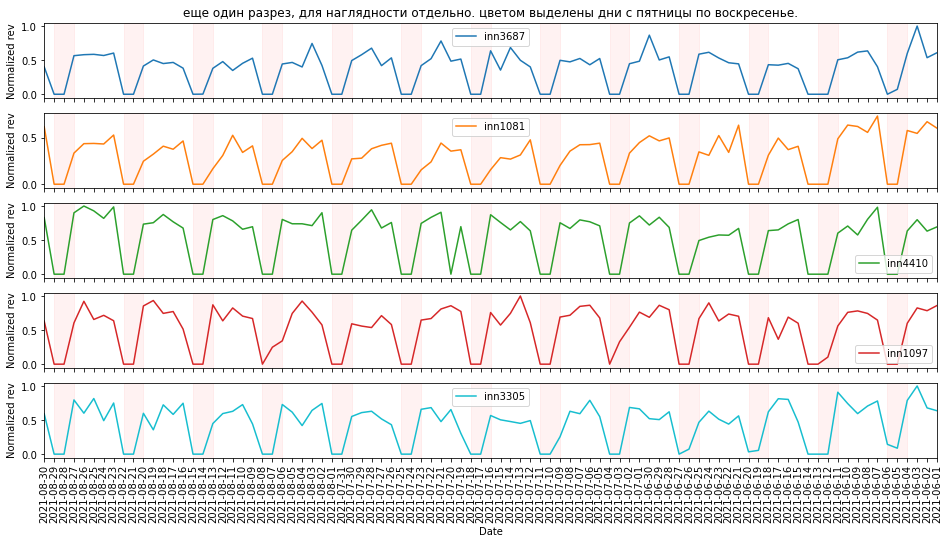

In [49]:
# еще один разрез, для наглядности отдельно. цветом выделены дни с пятницы по воскресенье.

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 8))
cols = corr_matrix.mean().sort_values(ascending=False).reset_index()['inn'].values.tolist()[100:105]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan']
for i in range(5):
    ax = axs[i]
    col = cols[i]
    ax.plot(inn_rev_byday_mean.index, inn_rev_byday_mean[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized rev')
    ax.set_xlim([inn_rev_byday_mean.index[0], inn_rev_byday_mean.index[-1]])
    ax.legend()
    ax.axvspan('2021-06-04', '2021-06-06', alpha=0.05, color='red')
    ax.axvspan('2021-06-11', '2021-06-13', alpha=0.05, color='red')
    ax.axvspan('2021-06-18', '2021-06-20', alpha=0.05, color='red')
    ax.axvspan('2021-06-25', '2021-06-27', alpha=0.05, color='red')
    
    ax.axvspan('2021-07-02', '2021-07-04', alpha=0.05, color='red')
    ax.axvspan('2021-07-09', '2021-07-11', alpha=0.05, color='red')
    ax.axvspan('2021-07-16', '2021-07-18', alpha=0.05, color='red')
    ax.axvspan('2021-07-23', '2021-07-25', alpha=0.05, color='red')
    ax.axvspan('2021-07-30', '2021-08-01', alpha=0.05, color='red')
    
    ax.axvspan('2021-08-06', '2021-08-08', alpha=0.05, color='red')
    ax.axvspan('2021-08-13', '2021-08-15', alpha=0.05, color='red')
    ax.axvspan('2021-08-20', '2021-08-22', alpha=0.05, color='red')
    ax.axvspan('2021-08-27', '2021-08-29', alpha=0.05, color='red')

axs[0].set_title('еще один разрез, для наглядности отдельно. цветом выделены дни с пятницы по воскресенье.')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

### Изучение целевой группы ИНН

#### Формирование контрольной группы ИНН для сравнения с целевой

In [50]:
data_rnm_control = data[(data.outcount_kkt <= 1)&(data.count_na_inn <= 1)]

inn_rev_byday_mean_control = (data_rnm_control
 .pivot_table(index='document_day', columns='inn', values='rev_norm', aggfunc='mean')
 .sort_values(by='document_day', ascending=False)
 .reset_index()
 .set_index('document_day')
 .fillna(value=0)
)

In [51]:
inn_goal = inn_rev_byday_mean.columns.tolist()
inn_control = inn_rev_byday_mean_control.columns.tolist()

#### Сравниваю целевую группу с контрольной

##### Коррелляционная матрица

In [52]:
corr_matrix.sum().max()

566.1921475491031

In [53]:
corr_matrix_control = inn_rev_byday_mean_control.corr()

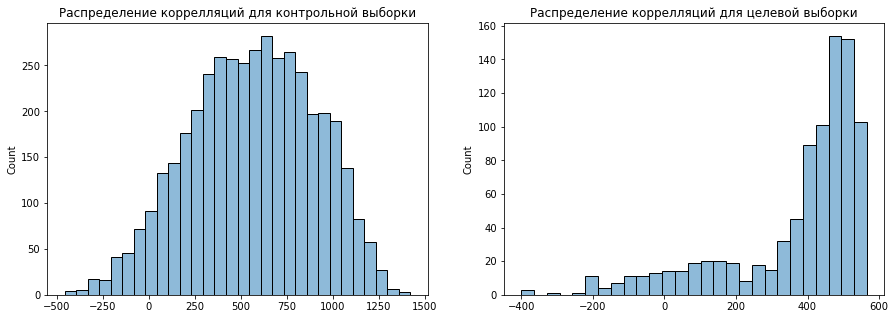

In [54]:
fig, ax1 = plt.subplots(1,2, figsize=(15,5))

sns.histplot(corr_matrix_control.sum().sort_values(ascending=False).reset_index(), ax=ax1[0], legend=False) 
ax1[0].set_title('Распределение коррелляций для контрольной выборки')
sns.histplot(corr_matrix.sum().sort_values(ascending=False).reset_index(), ax=ax1[1], legend=False) 
ax1[1].set_title('Распределение коррелляций для целевой выборки')

plt.show()
# высокая корреляция между ИНН показывает то, в целевой выборке большой процент ИНН с похожими паттернами движения доходов во времени.

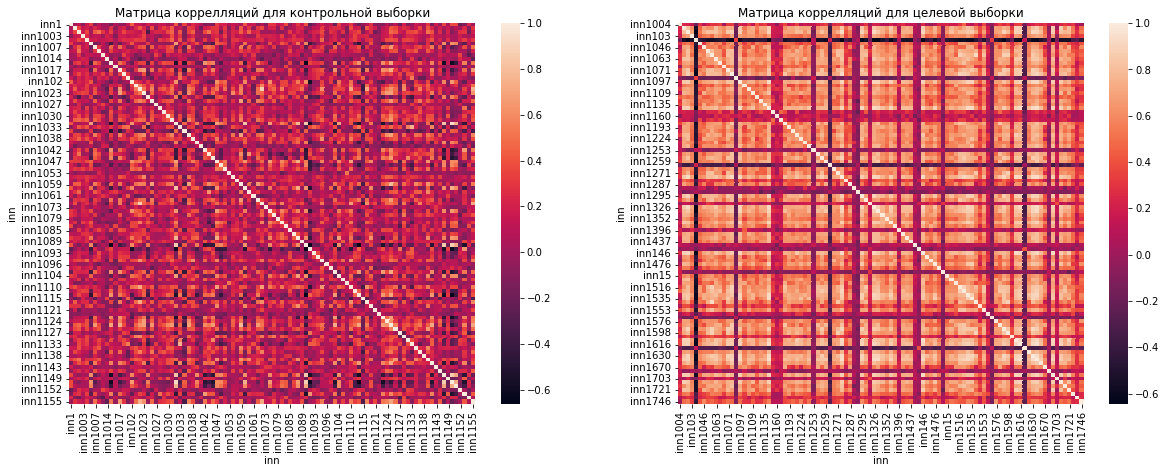

In [55]:
fig, ax1 = plt.subplots(1,2, figsize=(20,7))

sns.heatmap(corr_matrix_control.iloc[0:100,0:100], ax=ax1[0])
ax1[0].set_title('Матрица коррелляций для контрольной выборки')
sns.heatmap(corr_matrix.iloc[0:100,0:100], ax=ax1[1])
ax1[1].set_title('Матрица коррелляций для целевой выборки')

plt.show()

##### Графики движения среднего дохода (срез 1)

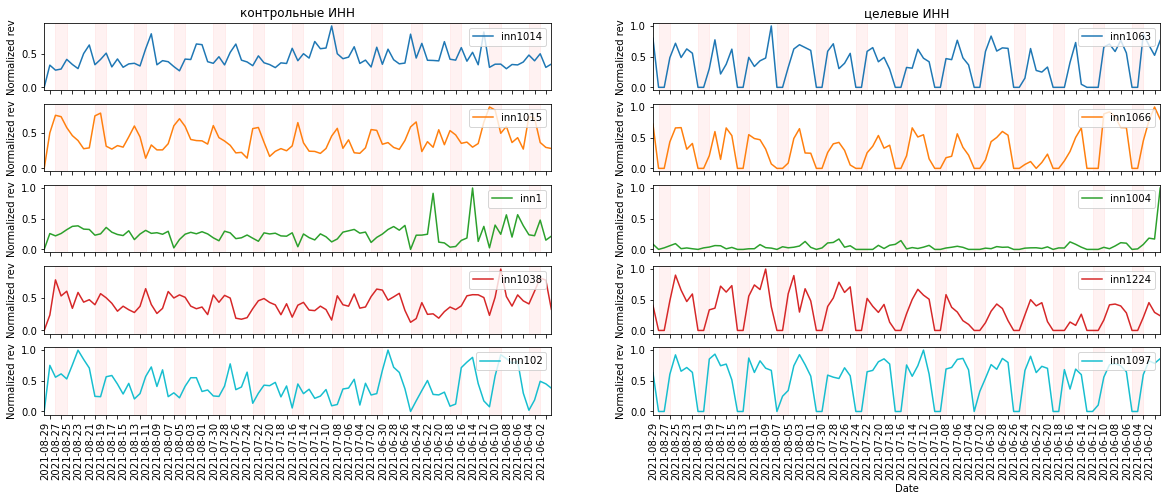

In [56]:
fig, axs = plt.subplots(5, 2, sharex=True, figsize=(20, 8))
cols = [9, 10, 0, 30, 15]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan']
for n, table, name in zip(range(2), [inn_rev_byday_mean_control, inn_rev_byday_mean], ['контрольные ИНН','целевые ИНН']):
    for i in range(5):
        ax = axs[i][n]
        col = table.columns[cols[i]]
        ax.plot(table.index, table[col], color=colors[i], label=col)
        ax.set_ylabel('Normalized rev')
        ax.set_xlim([table.index[0], table.index[-1]])
        ax.set_xticks([table.index[index] for index in filter(lambda x: x % 2 == 1, range(len(table.index)))])
        ax.legend(loc='upper right')
        ax.axvspan('2021-06-04', '2021-06-06', alpha=0.05, color='red')
        ax.axvspan('2021-06-11', '2021-06-13', alpha=0.05, color='red')
        ax.axvspan('2021-06-18', '2021-06-20', alpha=0.05, color='red')
        ax.axvspan('2021-06-25', '2021-06-27', alpha=0.05, color='red')

        ax.axvspan('2021-07-02', '2021-07-04', alpha=0.05, color='red')
        ax.axvspan('2021-07-09', '2021-07-11', alpha=0.05, color='red')
        ax.axvspan('2021-07-16', '2021-07-18', alpha=0.05, color='red')
        ax.axvspan('2021-07-23', '2021-07-25', alpha=0.05, color='red')
        ax.axvspan('2021-07-30', '2021-08-01', alpha=0.05, color='red')

        ax.axvspan('2021-08-06', '2021-08-08', alpha=0.05, color='red')
        ax.axvspan('2021-08-13', '2021-08-15', alpha=0.05, color='red')
        ax.axvspan('2021-08-20', '2021-08-22', alpha=0.05, color='red')
        ax.axvspan('2021-08-27', '2021-08-29', alpha=0.05, color='red')

    axs[0][n].set_title(name)
    plt.xlabel('Date')
    fig.autofmt_xdate(rotation=90)
#     plt.xticks(rotation=90)
#     axs[0][n].set_xticklabels(xlabels=table.index, rotation=90)
plt.show()


##### Графики движения среднего дохода (срез 2)

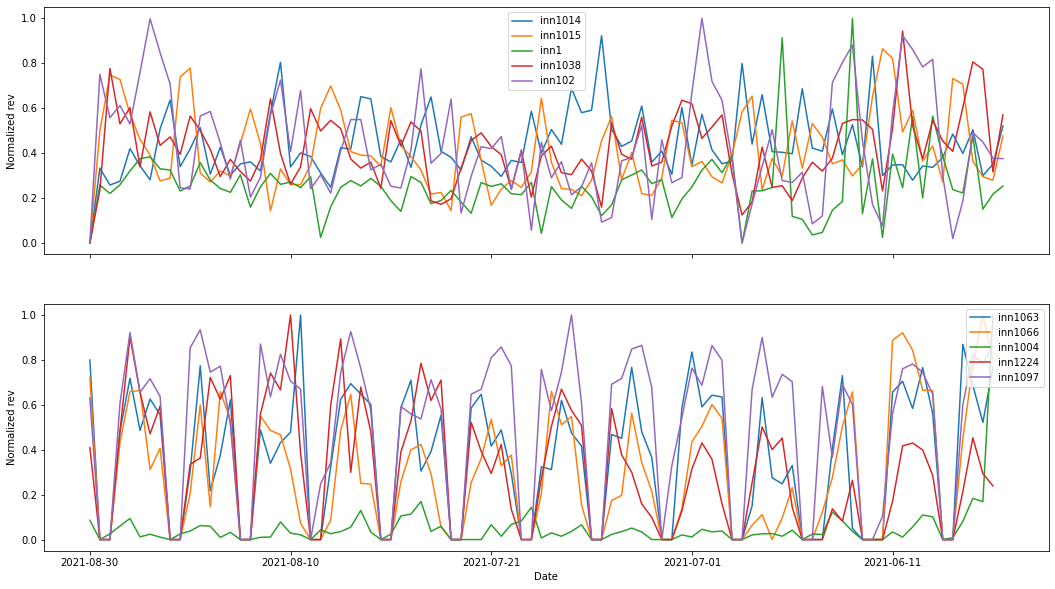

In [57]:
fig, ax1 = plt.subplots(2,1, sharex=True, figsize=(18,10))

cols = [9, 10, 0, 30, 15]
for col in inn_rev_byday_mean_control.columns[cols]:
    inn_rev_byday_mean_control[col] = inn_rev_byday_mean_control[col].astype('float64')    
    inn_rev_byday_mean_control.plot(y=col, use_index=True, ax=ax1[0])
ax1[0].set_ylabel('Normalized rev')
ax1[0].set_xlabel('Date')

for col in inn_rev_byday_mean.columns[cols]:
    inn_rev_byday_mean[col] = inn_rev_byday_mean[col].astype('float64')    
    inn_rev_byday_mean.plot(y=col, use_index=True, ax=ax1[1])
ax1[1].set_ylabel('Normalized rev')
ax1[1].set_xlabel('Date')
ax1[1].legend(loc='upper right')

plt.show()

#### Сравниваю нал/безнал у целевой и контрольной групп ИНН

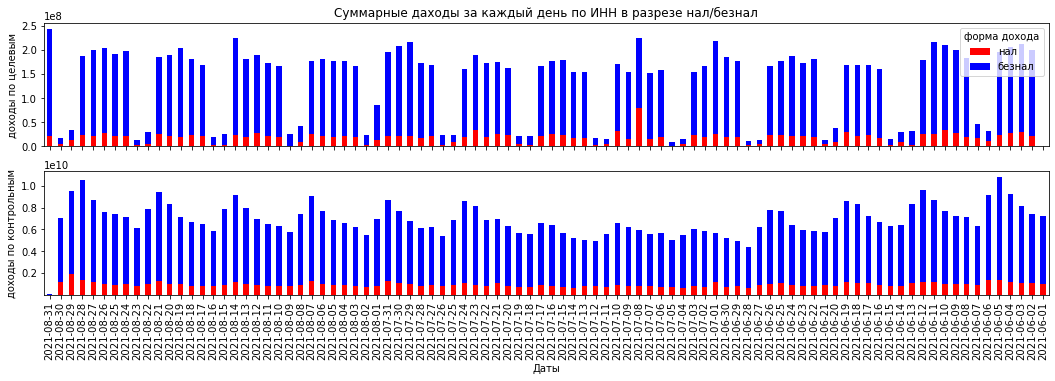

In [58]:
fig, ax1 = plt.subplots(2,1, sharex=True, figsize=(18,5))

(data[data.inn.isin(inn_goal)]
 .pivot_table(index='document_day', values=['cash','ecash'], aggfunc='sum')
 .sort_values(by='document_day', ascending=False)
 .reset_index()
 .set_index('document_day')
 .fillna(value=0)
).plot(kind='bar', stacked=True, color=['r', 'b'], ax=ax1[0])
ax1[0].set_ylabel("доходы по целевым")
ax1[0].legend(loc='upper right', labels=['нал', 'безнал'], title='форма дохода')

(data[data.inn.isin(inn_control)]
 .pivot_table(index='document_day', values=['cash','ecash'], aggfunc='sum')
 .sort_values(by='document_day', ascending=False)
 .reset_index()
 .set_index('document_day')
 .fillna(value=0)
).plot(kind='bar', stacked=True, color=['r', 'b'], ax=ax1[1], legend=False)
ax1[1].set_ylabel("доходы по контрольным")

plt.xlabel("Даты")
ax1[0].set_title("Суммарные даходы за каждый день по ИНН в разрезе нал/безнал")
plt.xticks(rotation=90)
plt.show()

#### Распределение дохода в разрезе оборота и кол-ва ккт

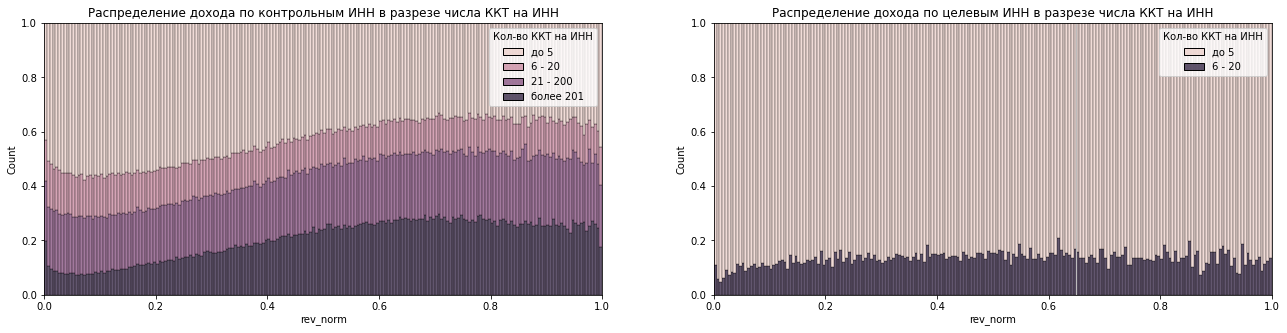

In [59]:
fig, ax1 = plt.subplots(1,2, figsize=(22,5))

sns.histplot(data=data[data.inn.isin(inn_control)], x="rev_norm", hue="group_rnm", bins=200, multiple="fill", ax=ax1[0])   

legend = ax1[0].get_legend()
handles = legend.legendHandles
ax1[0].legend(handles, ['до 5', '6 - 20', '21 - 200', 'более 201'], title='Кол-во ККТ на ИНН')
ax1[0].set_title('Распределение дохода по контрольным ИНН в разрезе числа ККТ на ИНН')

sns.histplot(data=data[data.inn.isin(inn_goal)], x="rev_norm", hue="group_rnm", bins=200, multiple="fill", ax=ax1[1])   

legend = ax1[1].get_legend()
handles = legend.legendHandles
ax1[1].legend(handles, ['до 5', '6 - 20', '21 - 200', 'более 201'], title='Кол-во ККТ на ИНН')
ax1[1].set_title('Распределение дохода по целевым ИНН в разрезе числа ККТ на ИНН')

plt.show()

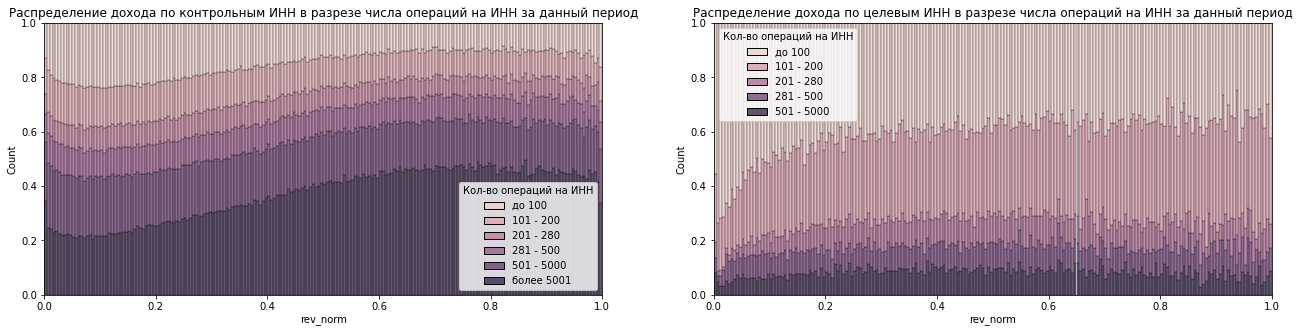

In [60]:
fig, ax1 = plt.subplots(1,2, figsize=(22,5))

sns.histplot(data=data[data.inn.isin(inn_control)], x="rev_norm", hue="group_oper", bins=200, multiple="fill", ax=ax1[0])   

legend = ax1[0].get_legend()
handles = legend.legendHandles
ax1[0].legend(handles, ['до 100', '101 - 200', '201 - 280', '281 - 500', '501 - 5000', 'более 5001'], title='Кол-во операций на ИНН')
ax1[0].set_title('Распределение дохода по контрольным ИНН в разрезе числа операций на ИНН за данный период')

sns.histplot(data=data[data.inn.isin(inn_goal)], x="rev_norm", hue="group_oper", bins=200, multiple="fill", ax=ax1[1])   

legend = ax1[1].get_legend()
handles = legend.legendHandles
ax1[1].legend(handles, ['до 100', '101 - 200', '201 - 280', '281 - 500', '501 - 5000', 'более 5001'], title='Кол-во операций на ИНН')
ax1[1].set_title('Распределение дохода по целевым ИНН в разрезе числа операций на ИНН за данный период')

plt.show()

## Сколько денег теряется

#### Сборка таблицы

In [61]:
pivot_goal_data = (data
 .pivot_table(index=['document_day','inn'], values='revenue', aggfunc=['sum'])
 .reset_index()
 .droplevel(1, axis=1)
)

In [62]:
pivot_goal_data_1 = (pivot_goal_data
 .pivot_table(index=['inn'], values='sum', aggfunc=['mean','sum'])
 .reset_index()
).droplevel(1, axis=1)

In [63]:
goal_na_days = inn_count_na_1[inn_goal].isna().sum().reset_index()
goal_na_days.columns = ['inn','nadays']

In [64]:
pivot_goal_data_2 = pd.merge(goal_na_days, pivot_goal_data_1, on=['inn'], how='left')

In [65]:
pivot_goal_data_2['debt'] = (pivot_goal_data_2['mean'] * pivot_goal_data_2['nadays'])

In [66]:
pivot_goal_data_2['debt_prop'] = pivot_goal_data_2['debt']/pivot_goal_data_2['sum']

In [67]:
temp1 = (data[data.inn.isin(inn_goal)]
 .pivot_table(index='inn', values=['group_oper','group_rnm'], aggfunc='mean')
 .reset_index()
)
temp2 = corr_matrix.mean().sort_values(ascending=False).reset_index()

In [68]:
inn_lost_income = pd.merge(temp1, temp2, on=['inn'], how='left')

In [69]:
inn_lost_income.columns = ['inn', 'group_oper', 'group_rnm', 'corr']

In [70]:
inn_lost_income['group_corr'] = 0
for i in range(len(inn_lost_income)):
    if inn_lost_income['corr'][i] < inn_lost_income['corr'].quantile(.08):
        inn_lost_income['group_corr'][i] = 3
    elif inn_lost_income['corr'][i] >= inn_lost_income['corr'].quantile(.26):
        inn_lost_income['group_corr'][i] = 1
    else:
        inn_lost_income['group_corr'][i] = 2

#### Общие вывоводы по доходам

In [76]:
print('доля целевых инн по отношению ко всем:', f'{inn_lost_income[inn_lost_income["group_corr"] == 1].inn.nunique()/data.inn.nunique():,.2%}')

доля целевых инн по отношению ко всем: 9.63%


In [77]:
print('средняя доля дохода, которую каждый инн в целевой выборке предположительно скрывает:', f'{inn_lost_income[inn_lost_income["group_corr"] == 1].debt_prop.mean():,.2%}') 

средняя доля дохода, которую каждый инн в целевой выборке предположительно скрывает: 42.51%


In [78]:
print('сумма предположительно скрываемых доходов целевыми инн за три месяца лета, включая дни ковидных ограничений ₽:',f'{inn_lost_income[inn_lost_income["group_corr"] == 1]["debt"].sum():,.2f}')

сумма предположительно скрываемых доходов целевыми инн за три месяца лета, включая дни ковидных ограничений ₽: 4,021,678,823.95


### Исследование самых крупных в целевой выборке ИНН (исключая выбросы)

In [79]:
print('доля самых крупных в выборке:', f'{inn_lost_income[(inn_lost_income.debt > 35000000)&(inn_lost_income["group_corr"] == 1)].debt.sum()/inn_lost_income[inn_lost_income["group_corr"] == 1]["debt"].sum():,.2%}') 

доля самых крупных в выборке: 12.65%


In [80]:
# pip install dataframe_image
# import dataframe_image as dfi

df_styled = inn_lost_income[['inn', 'nadays', 'mean', 'sum', 'debt', 'debt_prop', 'corr', 'count_rnm_byinn', 'count_oper_byinn']][(inn_lost_income.debt > 35000000)&(inn_lost_income['group_corr'] == 1)].style.\
    bar(subset='debt', align='mid', color=['#ee1f5f', 'pink']).\
    bar(subset='sum', align='mid', color=['#ee1f5f', 'lightblue']).\
    hide_index().\
    format({"mean": "₽{:,.2f}", 
            "sum": "₽{:,.2f}",
            "debt":"₽{:,.2f}"})

# dfi.export(df_styled,"upl751_pic_6_2.png")
df_styled

inn,nadays,mean,sum,debt,debt_prop,corr,count_rnm_byinn,count_oper_byinn
inn1012,28,"₽1,516,170.59","₽97,034,918.00","₽42,452,776.62",0.437500,0.600479,7,448
inn1639,28,"₽2,501,536.66","₽160,098,346.00","₽70,043,026.38",0.437500,0.635591,17,1079
inn1777,28,"₽2,565,828.12","₽164,213,000.00","₽71,843,187.50",0.437500,0.417683,3,190
inn2387,28,"₽1,324,253.09","₽84,752,198.00","₽37,079,086.62",0.437500,0.565892,5,314
inn2496,29,"₽1,301,002.57","₽81,963,162.00","₽37,729,074.57",0.460317,0.597594,3,183
inn2685,28,"₽1,275,360.14","₽81,623,049.00","₽35,710,083.94",0.437500,0.617116,6,384
inn3913,28,"₽1,563,300.78","₽100,051,250.00","₽43,772,421.88",0.437500,0.624580,12,758
inn4035,28,"₽1,868,619.75","₽119,591,664.00","₽52,321,353.00",0.437500,0.627556,9,572
inn4231,28,"₽1,473,379.77","₽94,296,305.00","₽41,254,633.44",0.437500,0.594213,4,251
inn6219,28,"₽1,470,059.05","₽94,083,779.00","₽41,161,653.31",0.437500,0.611081,7,439


In [ ]:
# выборочная проверка больших ИНН показала, что такой режим работы возможно связан со специализацией на обслуживание корпоративного сектора, а значит в выходные дни они просто не работают. 

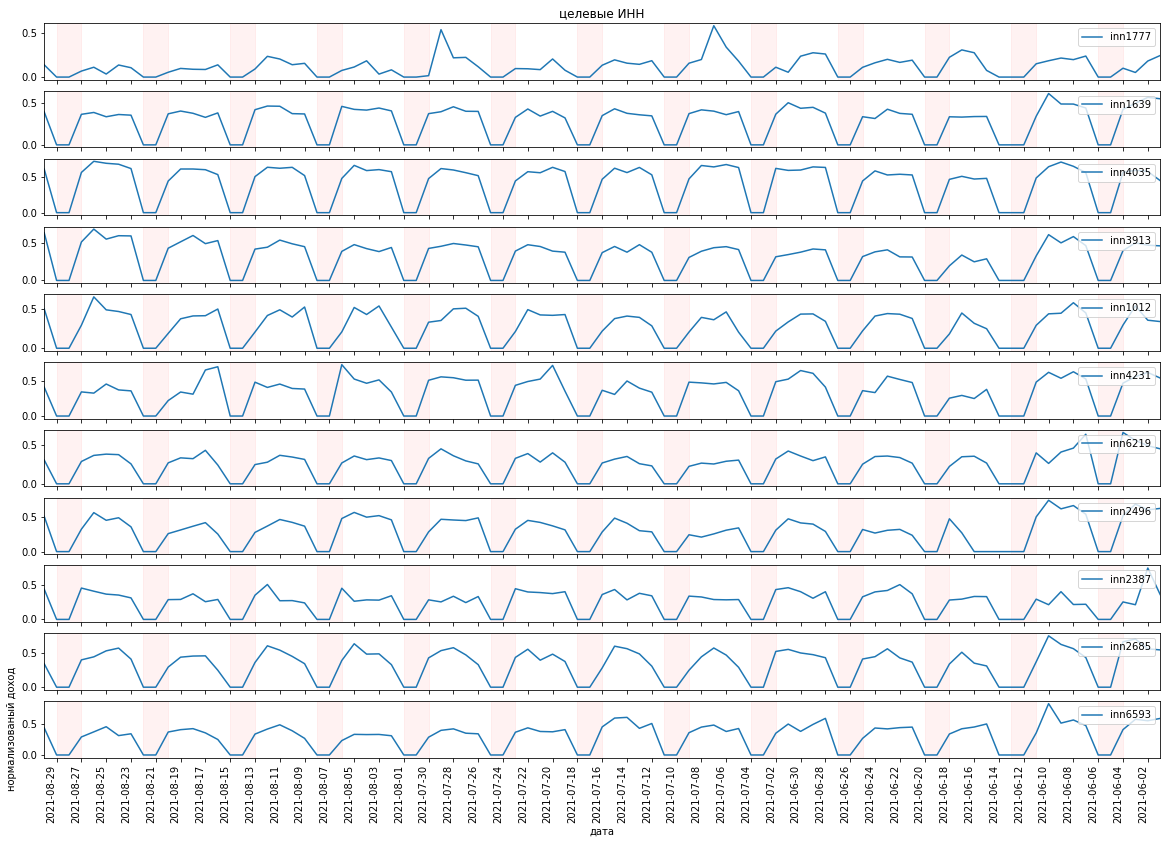

In [81]:
fig, axs = plt.subplots(11, sharex=True, figsize=(20, 15))
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan']
table = inn_rev_byday_mean[inn_lost_income[(inn_lost_income.debt > 35000000)&(inn_lost_income['group_corr'] == 1)].sort_values(by='debt', ascending=False).inn.tolist()]
for i in range(11):
    ax = axs[i]
    ax.plot(table.index, table.iloc[:,i], label=table.columns[i])
#     ax.set_ylabel('Normalized rev')
    ax.set_xlim([table.index[0], table.index[-1]])
    ax.set_xticks([table.index[index] for index in filter(lambda x: x % 2 == 1, range(len(table.index)))])
    ax.legend(loc='upper right')
    ax.axvspan('2021-06-04', '2021-06-06', alpha=0.05, color='red')
    ax.axvspan('2021-06-11', '2021-06-13', alpha=0.05, color='red')
    ax.axvspan('2021-06-18', '2021-06-20', alpha=0.05, color='red')
    ax.axvspan('2021-06-25', '2021-06-27', alpha=0.05, color='red')

    ax.axvspan('2021-07-02', '2021-07-04', alpha=0.05, color='red')
    ax.axvspan('2021-07-09', '2021-07-11', alpha=0.05, color='red')
    ax.axvspan('2021-07-16', '2021-07-18', alpha=0.05, color='red')
    ax.axvspan('2021-07-23', '2021-07-25', alpha=0.05, color='red')
    ax.axvspan('2021-07-30', '2021-08-01', alpha=0.05, color='red')

    ax.axvspan('2021-08-06', '2021-08-08', alpha=0.05, color='red')
    ax.axvspan('2021-08-13', '2021-08-15', alpha=0.05, color='red')
    ax.axvspan('2021-08-20', '2021-08-22', alpha=0.05, color='red')
    ax.axvspan('2021-08-27', '2021-08-29', alpha=0.05, color='red')

axs[0].set_title(name)
plt.xlabel('дата')
plt.ylabel("нормализованый доход")
fig.autofmt_xdate(rotation=90)
#     plt.xticks(rotation=90)
#     axs[0][n].set_xticklabels(xlabels=table.index, rotation=90)
plt.show()

### Исследование остальных ИНН (исключая выбросы)

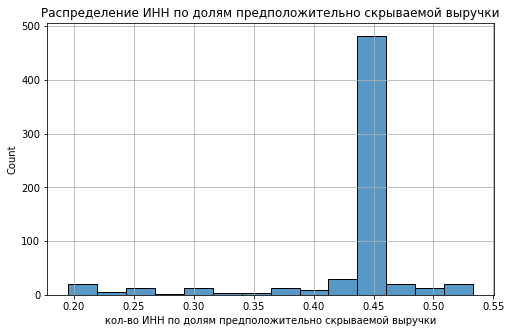

In [2031]:
fig, ax1 = plt.subplots(figsize=(8,5))

sns.histplot(data=inn_lost_income[(inn_lost_income.debt < 35000000)&(inn_lost_income['group_corr'] == 1)], x="debt_prop", bins=14, multiple="fill", ax=ax1)   

legend = ax1.get_legend()
ax1.grid(True)
ax1.set_xlabel("кол-во ИНН по долям предположительно скрываемой выручки")
ax1.set_title('Распределение ИНН по долям предположительно скрываемой выручки')

plt.show()

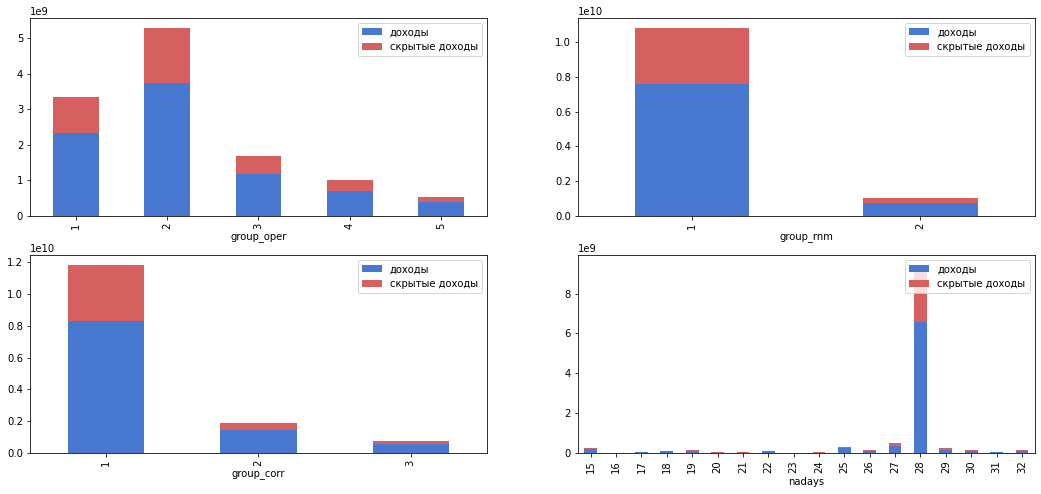

In [2032]:
fig, ax1 = plt.subplots(2,2, figsize=(18,8))

inn_lost_income[(inn_lost_income.debt < 35000000)&(inn_lost_income['group_corr'] == 1)].groupby('group_oper')['sum','debt'].agg(['sum']).plot.bar(stacked=True, color=['b','r'], ax=ax1[0][0])
ax1[0][0].legend(["доходы", "скрытые доходы"], ncol = 1, loc = 'upper right')

inn_lost_income[(inn_lost_income.debt < 35000000)&(inn_lost_income['group_corr'] == 1)].groupby('group_rnm')['sum','debt'].agg(['sum']).plot.bar(stacked=True, color=['b','r'], ax=ax1[0][1])
ax1[0][1].legend(["доходы", "скрытые доходы"], ncol = 1, loc = 'upper right')

inn_lost_income[(inn_lost_income.debt < 35000000)].groupby('group_corr')['sum','debt'].agg(['sum']).plot.bar(stacked=True, color=['b','r'], ax=ax1[1][0])
ax1[1][0].legend(["доходы", "скрытые доходы"], ncol = 1, loc = 'upper right')

inn_lost_income[(inn_lost_income.debt < 35000000)&(inn_lost_income['group_corr'] == 1)].groupby('nadays')['sum','debt'].agg(['sum']).plot.bar(stacked=True, color=['b','r'], ax=ax1[1][1])
ax1[1][1].legend(["доходы", "скрытые доходы"], ncol = 1, loc = 'upper right')

plt.show()

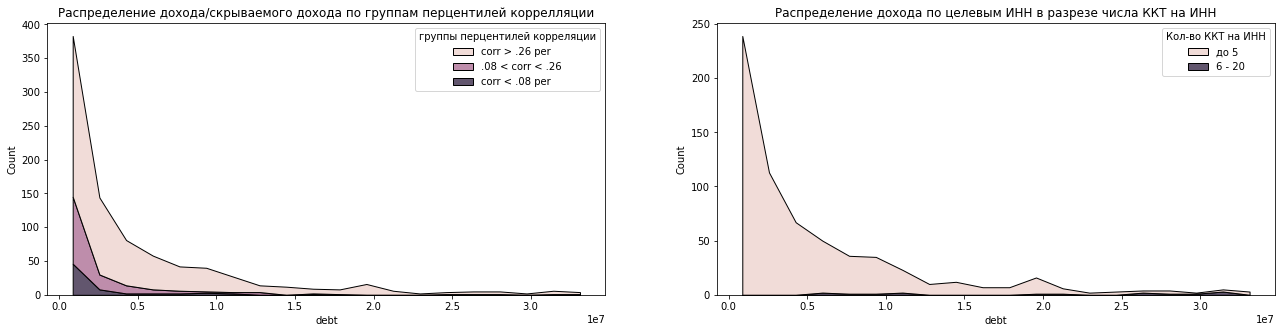

In [2033]:
fig, ax1 = plt.subplots(1,2, figsize=(22,5))

sns.histplot(data=inn_lost_income[inn_lost_income.debt < 35000000], x="debt", hue="group_corr", bins=20, multiple="stack", element="poly", ax=ax1[0])   

legend = ax1[0].get_legend()
handles = legend.legendHandles
ax1[0].legend(handles, ['corr > .26 per', '.08 < corr < .26', 'corr < .08 per'], title='группы перцентилей корреляции')
ax1[0].set_title('Распределение дохода/скрываемого дохода по группам перцентилей коррелляции')

sns.histplot(data=inn_lost_income[(inn_lost_income.debt < 35000000)&(inn_lost_income['group_corr'] == 1)], x="debt", hue="group_rnm", bins=20, multiple="stack", element="poly", ax=ax1[1])   

legend = ax1[1].get_legend()
handles = legend.legendHandles
ax1[1].legend(handles, ['до 5', '6 - 20', '21 - 200', 'более 201'], title='Кол-во ККТ на ИНН')
ax1[1].set_title('Распределение дохода по целевым ИНН в разрезе числа ККТ на ИНН')

plt.show()
